In [54]:
import pandas as pd
import numpy as np

In [55]:
delivery = pd.read_csv("data\IPL_Ball_by_Ball_2008_2022.csv")
match = pd.read_csv("data\IPL_Matches_2008_2022.csv")

In [56]:
match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [57]:
match.shape

(950, 20)

In [58]:
delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [59]:
total_score_df = delivery.groupby(['ID','innings']).sum()['total_run'].reset_index()

In [60]:
total_score_df=total_score_df[total_score_df['innings']==1]

In [61]:
match_df=match.merge(total_score_df[['ID','total_run']],left_on='ID',right_on='ID')

In [62]:
match_df['method'].unique()

array([nan, 'D/L'], dtype=object)

In [63]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [64]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

In [65]:
match_df['Team1'] = match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2'] = match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1'] = match_df['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['Team2'] = match_df['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['Team1'] = match_df['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['Team2'] = match_df['Team2'].str.replace('Kings XI Punjab','Punjab Kings')

In [66]:
match_df = match_df[match_df['Team1'].isin(teams)]
match_df = match_df[match_df['Team2'].isin(teams)]

In [67]:
match_df.shape

(835, 21)

In [68]:
match_df = match_df[match_df['method'] != 'D/L']

In [69]:
match_df.shape

(820, 21)

In [72]:
delivery.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [73]:
match_df = match_df[['ID','City','WinningTeam','total_run','Team1','Team2']]

In [74]:
delivery_df=match_df.merge(delivery,on='ID')

In [75]:
delivery_df = delivery_df[delivery_df['innings']==2]

In [76]:
delivery_df.shape

(95083, 22)

In [77]:
delivery_df

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196450,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196451,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196452,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [78]:
delivery_df['current_score'] = delivery_df['total_run_y'].cumsum()

In [79]:
delivery_df['current_score'] = delivery_df.groupby('ID')['total_run_y'].cumsum()

In [80]:
delivery_df['runs_left'] =  delivery_df['total_run_x'] - delivery_df['current_score']

In [81]:
delivery_df['balls_left'] = 120 - (delivery_df['overs']*6 + delivery_df['ballnumber'])

In [82]:
delivery_df['player_out'].unique()

array([nan, 'WP Saha', 'MS Wade', 'HH Pandya', 'YBK Jaiswal', 'SV Samson',
       'D Padikkal', 'Q de Kock', 'M Vohra', 'DJ Hooda', 'MP Stoinis',
       'KL Rahul', 'KH Pandya', 'Shubman Gill', 'JM Bairstow',
       'M Shahrukh Khan', 'MA Agarwal', 'S Dhawan', 'JM Sharma',
       'RG Sharma', 'Ishan Kishan', 'D Brevis', 'TH David', 'Tilak Varma',
       'JC Buttler', 'SO Hetmyer', 'F du Plessis', 'V Kohli', 'VR Iyer',
       'A Tomar', 'N Rana', 'SS Iyer', 'SW Billings', 'AD Russell',
       'RK Singh', 'UT Yadav', 'DR Sams', 'T Stubbs', 'R Sanjay Yadav',
       'PBB Rajapaksa', 'LS Livingstone', 'Harpreet Brar', 'R Dhawan',
       'K Rabada', 'A Badoni', 'JO Holder', 'PVD Chameera',
       'KS Williamson', 'RA Tripathi', 'Abhishek Sharma', 'N Pooran',
       'AK Markram', 'Washington Sundar', 'M Jansen', 'Shashank Singh',
       'MK Lomror', 'RM Patidar', 'GJ Maxwell', 'KD Karthik',
       'Shahbaz Ahmed', 'PWH de Silva', 'HV Patel', 'HR Shokeen',
       'KS Bharat', 'MR Marsh', 'KS S

In [83]:
delivery_df['player_out'] = delivery_df['player_out'].fillna("0")
delivery_df['player_out'] = delivery_df['player_out'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_out'] = delivery_df['player_out'].astype('int')


In [84]:
delivery_df['wicket'] = delivery_df['player_out'].cumsum()
delivery_df['wicket'] = 10 - delivery_df.groupby('ID')['player_out'].cumsum()

In [85]:
delivery_df

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wicket
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,0,130,119,10
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,0,130,118,10
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,117,10
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,116,10
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,0,0,NaN,NaN,Royal Challengers Bangalore,80,142,31,1
196450,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,0,0,NaN,NaN,Royal Challengers Bangalore,81,141,30,1
196451,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,0,NaN,NaN,Royal Challengers Bangalore,81,141,29,1
196452,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,0,0,NaN,NaN,Royal Challengers Bangalore,82,140,29,1


In [86]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [87]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [88]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [89]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [90]:
delivery_df.columns

Index(['ID', 'City', 'WinningTeam', 'total_run_x', 'Team1', 'Team2', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run_y', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'current_score', 'runs_left', 'balls_left', 'wicket',
       'crr', 'rrr', 'result'],
      dtype='object')

In [146]:
delivery_df.head(6)

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wicket,crr,rrr,result,BowlingTeam
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,NaN,Gujarat Titans,0,130,119,10,0.0,6.554622,1,Rajasthan Royals
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,NaN,Gujarat Titans,0,130,118,10,0.0,6.610169,1,Rajasthan Royals
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,NaN,Gujarat Titans,1,129,117,10,2.0,6.615385,1,Rajasthan Royals
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,NaN,Gujarat Titans,1,129,116,10,1.5,6.672414,1,Rajasthan Royals
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,NaN,Gujarat Titans,1,129,115,10,1.2,6.730435,1,Rajasthan Royals
125,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,6,Shubman Gill,...,NaN,Gujarat Titans,5,125,114,10,5.0,6.578947,1,Rajasthan Royals


In [98]:
delivery_df['BolwingTeam']=delivery_df.apply(lambda x: x['Team1'] if x['BattingTeam'] == x['Team2'] else x['Team2'], axis=1)


In [100]:
delivery_df['BowlingTeam'] = delivery_df['BolwingTeam']

In [103]:
delivery_df=delivery_df.drop(columns=['BolwingTeam'])

In [105]:
final_df=delivery_df[['BattingTeam','BowlingTeam','City','runs_left','balls_left','wicket','total_run_x','crr','rrr','result']]

In [107]:
final_df=final_df.sample(final_df.shape[0])

In [109]:
final_df.sample()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wicket,total_run_x,crr,rrr,result
137413,Deccan Chargers,Sunrisers Hyderabad,Chennai,114,85,9,160,7.885714,8.047059,0


In [119]:
final_df.dropna(inplace=True)

In [127]:
final_df = final_df[final_df['balls_left'] != 0]

In [128]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [129]:
X_train

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wicket,total_run_x,crr,rrr
148178,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,68,72,9,146,9.750000,5.666667
186376,Chennai Super Kings,Royal Challengers Bangalore,Chennai,17,11,3,126,6.000000,9.272727
958,Gujarat Titans,Rajasthan Royals,Kolkata,36,21,7,188,9.212121,10.285714
153655,Kolkata Knight Riders,Rajasthan Royals,Jaipur,152,115,10,159,8.400000,7.930435
127979,Rajasthan Royals,Punjab Kings,Jaipur,62,68,7,124,7.153846,5.470588
...,...,...,...,...,...,...,...,...,...
130949,Mumbai Indians,Royal Challengers Bangalore,Bangalore,62,33,7,156,6.482759,11.272727
105305,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,96,37,7,195,7.156627,15.567568
53428,Sunrisers Hyderabad,Chennai Super Kings,Hyderabad,12,26,7,132,7.659574,2.769231
138931,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,51,5,5,190,7.252174,61.200000


In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','City'])
]
,remainder='passthrough')

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [132]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [133]:
pipe.fit(X_train,y_train)

e:\iplwinpredictor\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [134]:
X_train.describe()

,runs_left,balls_left,wicket,total_run_x,crr,rrr
count,71016.000000,71016.000000,71016.000000,71016.000000,71016.000000,71016.000000
mean,92.075772,62.830038,7.550566,164.987327,7.414493,10.316814
std,49.687452,33.272128,2.135534,28.800900,2.241792,13.886374
min,-6.000000,-2.000000,0.000000,62.000000,0.000000,-510.000000
25%,53.000000,35.000000,6.000000,147.000000,6.272727,7.125000
50%,91.000000,64.000000,8.000000,165.000000,7.473684,8.817391
75%,129.000000,92.000000,9.000000,184.000000,8.649351,10.834951
max,246.000000,119.000000,10.000000,246.000000,36.000000,708.000000


In [135]:
y_pred=pipe.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.810070969922271

In [138]:
pipe.predict_proba(X_test)[10]

array([0.90706831, 0.09293169])

In [139]:
def match_summary(row):
    print("Batting Team-" + row['BattingTeam'] + " | Bowling Team-" + row['BowlingTeam'] + " | Target- " + str(row['total_run_x']))

In [169]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['ID'] == match_id]
    match = match[match['ballnumber'] == 6]
    temp_df = match[['BattingTeam','BowlingTeam','City','runs_left','balls_left','wicket','total_run_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_run_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wicket'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [187]:
delivery_df.sample()

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wicket,crr,rrr,result,BowlingTeam
130460,598002,Chennai,Mumbai Indians,148,Chennai Super Kings,Mumbai Indians,2,15,6,MS Dhoni,...,NaN,Chennai Super Kings,99,49,24,4,6.1875,12.25,0,Mumbai Indians


In [188]:
temp_df,target=match_progression(delivery_df,598002,pipe)
temp_df

Target- 148


,end_of_over,runs_after_over,wickets_in_over,lose,win
130368,1,5,0,38.5,61.5
130374,2,5,1,53.6,46.4
130380,3,4,0,55.8,44.2
130386,4,12,0,44.1,55.9
130393,5,6,1,57.9,42.1
130399,6,4,0,60.2,39.8
130405,7,4,0,62.4,37.6
130411,8,4,1,76.8,23.2
130417,9,5,0,77.3,22.7
130423,10,9,0,72.8,27.2


Text(0.5, 1.0, 'Target-148')

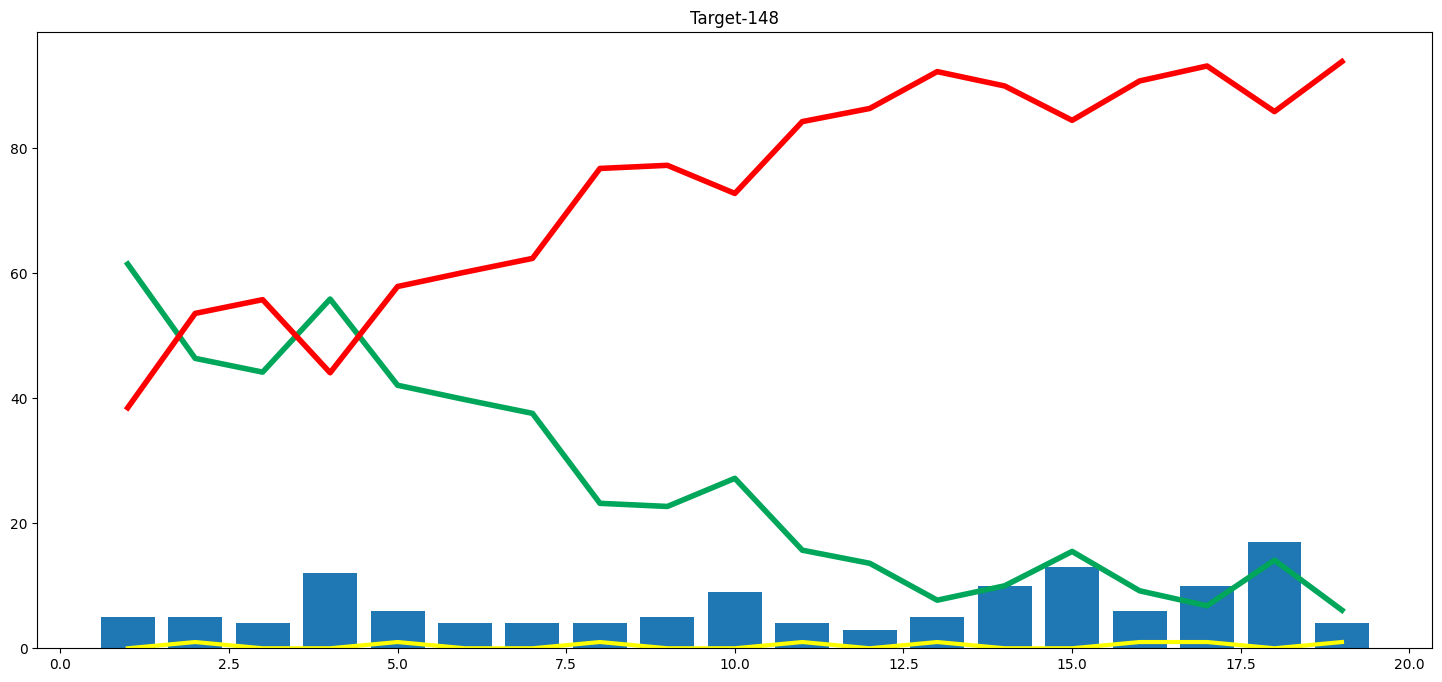

In [189]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [182]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [184]:
delivery_df['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Raipur', 'Ranchi', 'Cuttack', 'Dharamsala', 'Nagpur',
       'Johannesburg', 'Centurion', 'Durban', 'Bloemfontein',
       'Port Elizabeth', 'Kimberley', 'East London', 'Cape Town'],
      dtype=object)

In [191]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))